In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import ARDRegression, LinearRegression

In [2]:
np.random.seed(0)

In [3]:
n_samples, n_features = 100, 100

In [4]:
X = np.random.randn(n_samples, n_features)

In [5]:
lambda_ = 4.
w = np.zeros(n_features)
relevant_features = np.random.randint(0, n_features, 10)

In [6]:
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

In [7]:
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)

In [8]:
y = np.dot(X, w) + noise

In [9]:
clf = ARDRegression(compute_score=True)
clf.fit(X, y)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=True, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

In [10]:
ols = LinearRegression()
ols.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

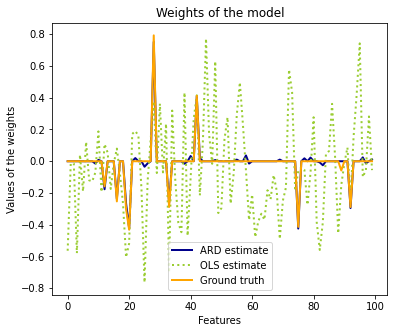

In [11]:
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, color='darkblue', linestyle='-', linewidth=2,
         label="ARD estimate")
plt.plot(ols.coef_, color='yellowgreen', linestyle=':', linewidth=2,
         label="OLS estimate")
plt.plot(w, color='orange', linestyle='-', linewidth=2, label="Ground truth")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc=8)

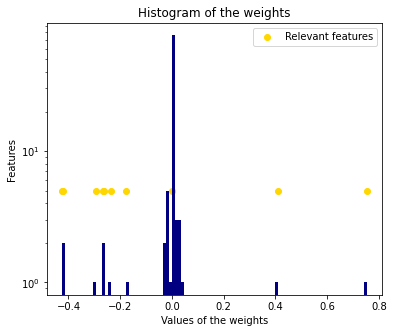

In [12]:
plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, color='navy', log=True)
plt.scatter(clf.coef_[relevant_features], np.full(len(relevant_features), 5.),
            color='gold', marker='o', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc=1)

Text(0.5, 0, 'Iterations')

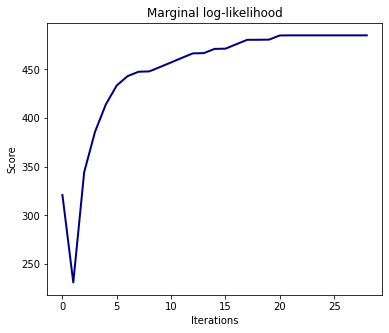

In [13]:
plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_, color='navy', linewidth=2)
plt.ylabel("Score")
plt.xlabel("Iterations")